# `Project 2: Demonstrating Exploratory Data Analysis`

### <font color='blue'> __Purpose:__</font>
- The intent of this project is to demonstrate the importance & insightful capabilities of performing Exploratory Data Analysis (EDA).

### <font color='blue'> __Objectives:__</font>
1. Provide appropriately-labelled graphical visuals to enhance understanding of data.
2. Interpret descriptive statistics.
3. Formulate sound assumptions & justify observations with concrete statistical hypothesis testing.

### <font color='blue'> __Why EDA?__</font>

1. Gives you an opportunity to familiarise yourself with the data.
2. Understand the distribution of the population and detect for any strange behaviour (outliers).
3. Allows one to explore relationships between variables.
4. Test these observed relationships/hypothesis for any statistical significance so as to provide meaningful business insights.
5. Provides preliminary ideas as to how we can potential employ various Machine Learning Models.

### <font color='blue'> __What does it entail?__</font>

1. Get a high-level overview of the distribution of the dataset & detect for the presence of any outliers.
> Examples: .describe( ) and boxplots
2. Derive & identify meaningful observations/relationships btwn variables.
> Examples: .corr( ), Seaborn's pairplot & heatmap
3. Prove to see if there is statistical significance in those relationships observed.
> Examples: T-test, chi-square test etc.

### <font color='blue'> __Codes are in Python & the following libraries:__</font>
1. Pandas
2. NumPy
3. SciPy
4. Seaborn
5. Matplotlib

### <font color='blue'> __Problem Statement:__</font>

Imagine you are a data scientist working for a real estate company.
The company's main aim is to purchase houses at a lower price and at the same time, does not cost much to renovate based on its current condition.
Your team lead has divided the project into 2 parts:
1. Predicting the value of housing prices based on fixed characteristics (i.e. characteristics which cannot be renovated).
2. Identifying renovatable characteristics which bear a lower cost.

You and your team are tasked to work on the _first part_.
<br>The complete dataset can be found at __[Kaggle: House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)__

***
***

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import t

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format ='retina'

import seaborn as sns
sns.set_style('whitegrid')

from ipywidgets import *
from IPython.display import display

__Note:__
<br> The dataset we are about to import has been "cleaned".
<br> If you would like to see how I carried out the data munging process for this dataset,
please refer to `Project 1: Demonstrating Data Munging`.

In [3]:
# Importing the dataset.
property_tab = pd.read_csv('./Property Dataset (Cleaned).csv')

In [4]:
property_tab = property_tab.drop(labels='Unnamed: 0',axis=1)

## <font color=pink> __Step 1: High-level overview of dataset__</font>

In [5]:
property_tab.shape

(1459, 55)

In [6]:
property_tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 55 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
ExterQual        1459 no

### Descriptive Statistics for continuous variables

In [16]:
# The .describe() function is only meaningful for continuous variables.
# By using the .info() function above, we will pick out those that are continuous.

Continuous variables: LotFrontage, LotArea, YearBuilt, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, YearsRenoed, SalePrice

In [22]:
cont_variables = property_tab[['LotFrontage', 'LotArea', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'YearsRenoed', 'SalePrice']]

In [23]:
cont_variables.describe()

,LotFrontage,LotArea,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,YearsRenoed,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,70.047936,10517.363948,1971.244003,1057.891021,1162.906785,346.791638,1515.546950,473.030158,13.606580,180930.394791
std,22.031439,9984.666267,30.199555,438.500975,386.572089,436.610637,525.650927,213.869604,24.482633,79468.964025
min,21.000000,1300.000000,1872.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,34900.000000
25%,60.000000,7549.000000,1954.000000,796.000000,882.000000,0.000000,1129.000000,333.000000,0.000000,129950.000000
50%,70.049958,9477.000000,1973.000000,992.000000,1088.000000,0.000000,1464.000000,480.000000,0.000000,163000.000000
75%,79.000000,11603.000000,2000.000000,1298.500000,1391.500000,728.000000,1777.500000,576.000000,20.000000,214000.000000
max,313.000000,215245.000000,2010.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,123.000000,755000.000000


__[Interpretation]__

1. The average sale price of 'proporties' in this sample is $180930.
2. The average 'lot area' & 'ground living area' is 10517 & 1515 square feet, respectively.
3. It is not appropriate to interpret the mean for 'TotalBsmtSF', '2ndFlrSF', 'GarageArea' & 'YearsRenoed' in the case as some properties do not have a basement, 2nd floor, garage area and renovation, respectively.
<br> You can tell this from the table that the min value is 0.
<br> To address this, properties with zeroes need to be filtered out first, before calculating its mean.
4. Mean-standard deviation & median-interquartile ranges gives you a raw overview of the distribution within the population. It is handy & quick, but cannot be used to represent a population/interpreted in solitude.
5. For columns like 'LotArea', 'TotalBsmtSF', '1stFlrSF' & 'SalePrice', although their mean & median differs, we can assume that this sample employs a normal distribution in general, based on the Central Limit Theorem (normal if n>30).

### Outlier detection

In [25]:
# Outlier detection for LotFrontage, LotArea, SalePrice
variables = property_tab[['LotFrontage','LotArea','SalePrice']]

LotFrontage        AxesSubplot(0.08,0.125;0.255882x0.755)
LotArea        AxesSubplot(0.387059,0.125;0.255882x0.755)
SalePrice      AxesSubplot(0.694118,0.125;0.255882x0.755)
dtype: object

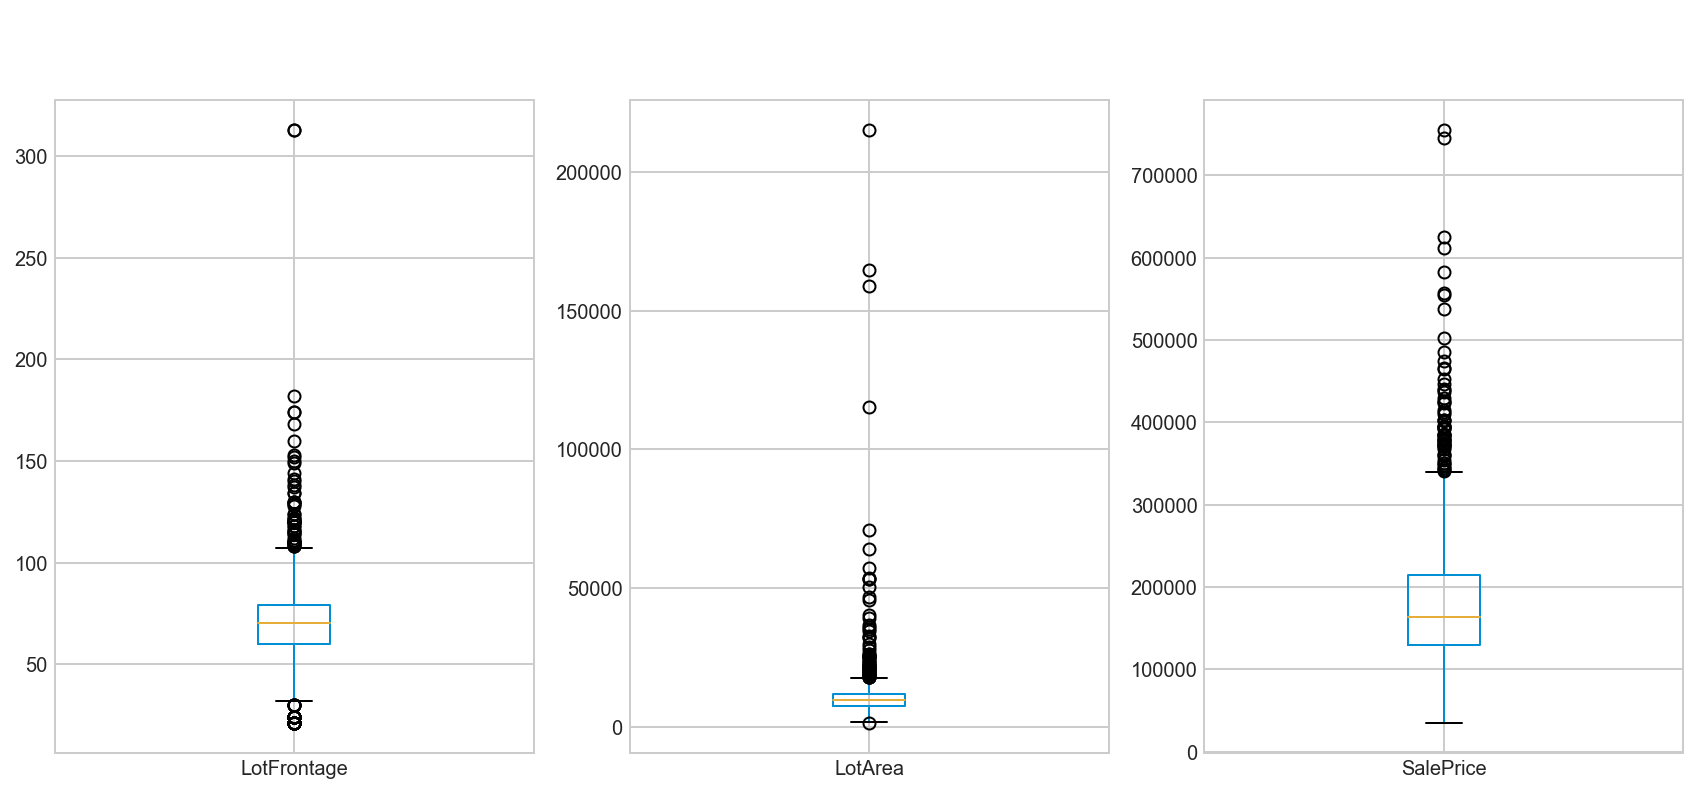

In [26]:
variables.plot(kind='box',subplots=True,title=' ',figsize=(13,6))

__[Interpretation]__

1. There are quite afew values that reside after the 75th percentile for 'LotFrontage','LotArea','SalePrice' with 1, 4 & 2 outliers, respectively.
2. These could have either been properties built before the year 2000 when land was plentiful (in the case of large lot areas) or really expensive houses with large lot areas.

***

## <font color=pink> __Step 2: derive & identify meaningful relationships btwn variables.__</font>

In [ ]:
property_tab.corr()

In [ ]:
# Step 2: derive & identify meaningful relationships btwn variables.

# .corr, .pairplot, heatmap

***
***
***

In [ ]:
#Correlation
boston.corr()
sns.heatmap (half of it)

In [ ]:
# sns.pairplot
# sns.heatmap

In [ ]:
# Plotting afew things at one go.
fig, axes = plt.subplots(2,2, figsize=(16,8))
df['col2'].plot(figsize=(16,4), color='purple', fontsize=21, ax=axes[0][0])

In [ ]:
# Step 3: Prove to see if there is statistical significance in those relationships observed.